# Data Preparation

### Imports

In [248]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Import Data
df_raw = pd.read_excel("../data/13222067.xlsx", "Sheet1")
df_raw.head()


,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Pria,47,SMA,"Pekerja serabutan (jaga kos, antar aqua galon,...",Rp 2 juta – Rp 5 juta,Bandung,300%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,Melalui minimarket,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
1,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Surabaya,1000%,Ya,Keperluan mengerjakan tugas,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pria,50,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Jakarta,600%,Ya,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,500%,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
4,Pria,28,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Bandung,900%,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN


### Restructure/ Data

In [249]:
# Data Dimension and Type
df_raw.info()
df_raw.shape

# Column Names
columnList = df_raw.columns.tolist()
print(columnList)

newColumnNames = [
        # A. Intro
        # 1. [0-8] Demographic
        "jenis_kelamin", "usia", "pendidikan", "pekerjaan", "penghasilan", "domisili", "durasi_internet",  "aktivitas_online_meningkat", "aktivitas_online_meningkat_3bln"

        # B. Bank
        # 2. [9-14] Service/Layanan Aktif (Mobile Banking, ATM, Kartu Kredit, Internet Banking)
        , "layanan_aktif_1", "layanan_aktif_2", "layanan_aktif_3", "layanan_aktif_4", "layanan_aktif_5", "layanan_aktif_6"
        # 3. [15-21] Banks (BNI, Mandiri, BCA, CIMB, BRI, BTN, Permata)
        , "bank_1", "bank_2", "bank_3", "bank_4", "bank_5", "bank_6", "bank_7"
        # 4. [22-26] Channel Bank Frequency
        , "freq_atm", "freq_internet_bank", "freq_mobile_bank", "freq_sms_bank", "freq_cabang"
        # 5. [27-32] Liked Feature
        , "fitur_cekSaldo", "fitur_mutasi", "fitur_transfer_sesamabank", "fitur_transfer_antarbank", "fitur_pulsa", "fitur_tagihan"
        # 6. [33-36] Keluhan
        , "keluhan_1", "keluhan_2", "keluhan3", "keluhan 4"

        # C. E-Money
        # 7. [37-47]emoney pilihan
        , "emoney_pilihan1", "emoney_pilihan2", "emoney_pilihan3", "emoney_pilihan4", "emoney_pilihan5", "emoney_pilihan6"
        , "emoney_pilihan7", "emoney_pilihan8", "emoney_pilihan9", "emoney_pilihan10", "emoney_pilihan11"
        # 8. [48-52]alasan pilih emoney
        , "alasan_emoney_1", "alasan_emoney_2", "alasan_emoney_3", "alasan_emoney_4", "alasan_money_5"
        # 9. [53-62]penggunaan emoney
        , "penggunaan_emoney_1", "penggunaan_emoney_2", "penggunaan_emoney_3", "penggunaan_emoney_4", "penggunaan_emoney_5"
        , "penggunaan_emoney_6", "penggunaan_emoney_7", "penggunaan_emoney_8", "penggunaan_emoney_9", "penggunaan_emoney_10"
        # 10. [63-69]cara topup
        , "cara_topup_emoney_1", "cara_topup_emoney_2", "cara_topup_emoney_3", "cara_topup_emoney_4", "cara_topup_emoney_5", "cara_topup_emoney_6", "cara_topup_emoney_7"
        # 11. [70-71]nominal dan frekuensi topup
        , "nominal_topup", "freq_topup"
        # 12. [72-75]keluhan emoney
        , "keluhan_emoney_1", "keluhan_emoney_2", "keluhan_emoney_3", "keluhan_emoney_4"
        # 13. [76-79]penggunaan qr
        , "penggunaan_qr_1", "penggunaan_qr_2", "penggunaan_qr_3", "penggunaan_qr_4"
        # 14. [80-85]lokasi qr
        , "lokasi_qr_1", "lokasi_qr_2", "lokasi_qr_3", "lokasi_qr_4", "lokasi_qr_5", "lokasi_qr_6"

        # D. Belanja
        # 15. [86]Frekuensi Belanja
        , "freq_belanja_6bln"
        # 16. [87-96]Belanja Online Meningkat 6 Bulan
        , "belanja_online_1", "belanja_online_2", "belanja_online_3", "belanja_online_4", "belanja_online_5"
        , "belanja_online_6", "belanja_online_7", "belanja_online_8", "belanja_online_9", "belanja_online_10"
        # 17. [97-107]Kecenderungan Belanja
        , "belanja_fashion", "belanja_groceries", "belanja_hp", "belanja_laptop", "belanja_elektronik"
        , "belanja_kosmetik", "belanja_hobi", "belanja_pulsa", "belanja_makanan", "belanja_pesawat", "belanja_bioskop"
        # 18. [108-115]Tempat Belanja Online
        , "tempat_belanja_online_1", "tempat_belanja_online_2", "tempat_belanja_online_3", "tempat_belanja_online_4"
        , "tempat_belanja_online_5", "tempat_belanja_online_6", "tempat_belanja_online_7", "tempat_belanja_online_8"
        # 19. [116-127]Ecommerce dan [128]Food Delivery
        , "ecommerce_1", "ecommerce_2", "ecommerce_3", "ecommerce_4", "ecommerce_5", "ecommerce_6"
        , "ecommerce_7", "ecommerce_8", "ecommerce_9", "ecommerce_10", "ecommerce_11", "ecommerce_12"
        , "foodDelivery"
        # 20. [129-136]Alasan Belanja Offline
        , "alasan_offline_1", "alasan_offline_2", "alasan_offline_3", "alasan_offline_4", "alasan_offline_5", "alasan_offline_6", "alasan_offline_7"
        # 21. [137-144]Cara bayar Online
        , "bayar_online_1", "bayar_online_2", "bayar_online_3", "bayar_online_4", "bayar_online_5", "bayar_online_6", "bayar_online_7", "bayar_online_8"
        # 22. [145-150]Keluhan Online
        , "keluhan_online_1", "keluhan_online_2", "keluhan_online_3", "keluhan_online_4", "keluhan_online_5", "keluhan_online_6"
        ]
# columnList[len(newColumnNames)-1]
# print(columnList[86])

df_renamed = df_raw.set_axis(newColumnNames, axis=1)
df_renamed.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 150 entries, Jenis Kelamin to keluhan_belanja_online_6
dtypes: int64(1), object(149)
memory usage: 338.8+ KB
['Jenis Kelamin', 'Usia', 'Pendidikan Terakhir', 'Pekerjaan', 'Penghasilan per Bulan', 'Domisili', 'Durasi Penggunaan Internet per Hari (dalam Jam)', 'Aktivitas Online Meningkat', 'Aktivitas yang Meningkat dalam 3 Bulan Terakhir', 'layanan_aktif_1', 'layanan_aktif_2', 'layanan_aktif_3', 'layanan_aktif_4', 'layanan_aktif_5', 'layanan_aktif_6', 'bank_1', 'bank_2', 'bank_3', 'bank_4', 'bank_5', 'bank_6', 'bank_7', '18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM]', '18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Internet Banking ]', '18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]', '18. Bagaimana frekuensi penggunaan Channel Bank berikut? [SMS Banking]', '18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Datang ke cabang bank]', '19. Manakah 

,jenis_kelamin,usia,pendidikan,pekerjaan,penghasilan,domisili,durasi_internet,aktivitas_online_meningkat,aktivitas_online_meningkat_3bln,layanan_aktif_1,...,bayar_online_5,bayar_online_6,bayar_online_7,bayar_online_8,keluhan_online_1,keluhan_online_2,keluhan_online_3,keluhan_online_4,keluhan_online_5,keluhan_online_6
0,Pria,47,SMA,"Pekerja serabutan (jaga kos, antar aqua galon,...",Rp 2 juta – Rp 5 juta,Bandung,300%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,Melalui minimarket,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
1,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Surabaya,1000%,Ya,Keperluan mengerjakan tugas,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pria,50,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Jakarta,600%,Ya,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,500%,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
4,Pria,28,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Bandung,900%,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN


### Remove Inconsistent Data Entry

In [250]:
print(np.sort(df_renamed["domisili"].unique()))
# print(df_renamed["durasi_internet"].unique())


['Ambon' 'BEKASI' 'Balikpapan' 'Bandung' 'Bekasi' 'Bekasi ' 'Bogor'
 'Bondowoso ' 'Cikarang' 'Cilegon' 'Cimahi' 'Depok' 'Depok ' 'Garut'
 'Hsinchu' 'Jakarta' 'Jatinangor' 'Kab. Garut' 'Kabupaten Bogor'
 'Kalimantan Barat' 'Karawang' 'Lampung' 'Magetan' 'Majalengka' 'Makassar'
 'Malang' 'Medan' 'Medan ' 'PURWOKERTO ' 'Padang' 'Palembang'
 'Pekalongan ' 'Pontianak' 'Purwokerto' 'Purworejo' 'Semarang'
 'Singapura ' 'Singkawang' 'Sorong' 'Sumatera Barat' 'Surabaya'
 'Surakarta' 'Tangerang' 'Tangerang Selatan' 'Tangerang Selatan '
 'Tasikmalaya' 'Yogyakarta' 'bogor' 'depok' 'semarang']


In [251]:
df_renamed['domisili'] = df_renamed['domisili'].str.lower() # Remove Uppercase
df_renamed['domisili'] = df_renamed['domisili'].str.strip() # Remove whitespace
print(np.sort(df_renamed["domisili"].unique()))

['ambon' 'balikpapan' 'bandung' 'bekasi' 'bogor' 'bondowoso' 'cikarang'
 'cilegon' 'cimahi' 'depok' 'garut' 'hsinchu' 'jakarta' 'jatinangor'
 'kab. garut' 'kabupaten bogor' 'kalimantan barat' 'karawang' 'lampung'
 'magetan' 'majalengka' 'makassar' 'malang' 'medan' 'padang' 'palembang'
 'pekalongan' 'pontianak' 'purwokerto' 'purworejo' 'semarang' 'singapura'
 'singkawang' 'sorong' 'sumatera barat' 'surabaya' 'surakarta' 'tangerang'
 'tangerang selatan' 'tasikmalaya' 'yogyakarta']


In [252]:
df_renamed['domisili'] = df_renamed['domisili'].replace('kabupaten bogor', 'bogor')
df_renamed['domisili'] = df_renamed['domisili'].replace('kab. garut', 'garut')
print(np.sort(df_renamed["domisili"].unique()))

['ambon' 'balikpapan' 'bandung' 'bekasi' 'bogor' 'bondowoso' 'cikarang'
 'cilegon' 'cimahi' 'depok' 'garut' 'hsinchu' 'jakarta' 'jatinangor'
 'kalimantan barat' 'karawang' 'lampung' 'magetan' 'majalengka' 'makassar'
 'malang' 'medan' 'padang' 'palembang' 'pekalongan' 'pontianak'
 'purwokerto' 'purworejo' 'semarang' 'singapura' 'singkawang' 'sorong'
 'sumatera barat' 'surabaya' 'surakarta' 'tangerang' 'tangerang selatan'
 'tasikmalaya' 'yogyakarta']


In [253]:
print(df_renamed["domisili"].value_counts())

domisili
bandung              82
jakarta              75
tangerang            21
medan                14
bekasi               13
bogor                11
yogyakarta           11
surabaya              7
semarang              6
depok                 5
palembang             3
malang                3
lampung               3
cilegon               3
pontianak             3
garut                 2
makassar              2
tangerang selatan     2
purwokerto            2
cimahi                2
pekalongan            1
kalimantan barat      1
bondowoso             1
tasikmalaya           1
sumatera barat        1
singkawang            1
jatinangor            1
cikarang              1
surakarta             1
padang                1
ambon                 1
karawang              1
balikpapan            1
majalengka            1
singapura             1
magetan               1
hsinchu               1
purworejo             1
sorong                1
Name: count, dtype: int64


In [254]:
df_renamed["durasi_internet"].unique()

array(['300%', '1000%', '600%', '500%', '900%', nan, '2000%', '1400%',
       '1200%', '800%', '700%', '1600%', '2400%', '400%', '1700%',
       '1800%', '1500%', '1300%', '200%', '100%'], dtype=object)

In [255]:
df_renamed['durasi_internet'] = df_renamed['durasi_internet'].str.rstrip('%')
df_renamed['durasi_internet'] = df_renamed['durasi_internet'].astype("float")/100
print(df_renamed["durasi_internet"].unique())

<FloatingArray>
[ 3.0, 10.0,  6.0,  5.0,  9.0, <NA>, 20.0, 14.0, 12.0,  8.0,  7.0, 16.0, 24.0,
  4.0, 17.0, 18.0, 15.0, 13.0,  2.0,  1.0]
Length: 20, dtype: Float64


### Handle Missing Values

In [256]:
df_demo = df_renamed.iloc[:, 0:8]
null_values = (df_demo.isnull().sum())
total_values = (df_demo.shape[0])
for col in df_demo.columns:
    print("{}           : {}/{} ({})".format(col, null_values[col], total_values, null_values[col]/total_values))

jenis_kelamin           : 0/289 (0.0)
usia           : 0/289 (0.0)
pendidikan           : 0/289 (0.0)
pekerjaan           : 0/289 (0.0)
penghasilan           : 0/289 (0.0)
domisili           : 0/289 (0.0)
durasi_internet           : 84/289 (0.2906574394463668)
aktivitas_online_meningkat           : 2/289 (0.006920415224913495)


### Handle Outliers

289


<Axes: xlabel='usia'>

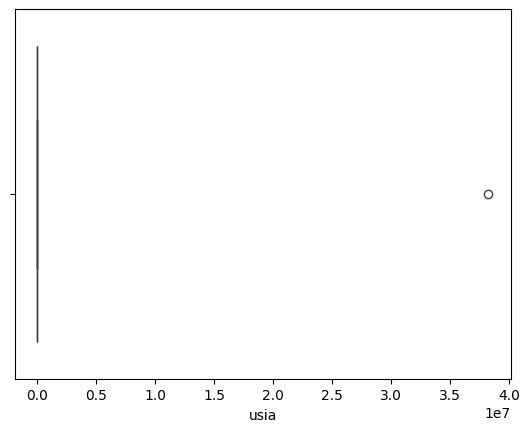

In [257]:
print(df_renamed.shape[0])
sns.boxplot(data=df_renamed, x=df_renamed["usia"])

In [258]:
q1 = df_renamed["usia"].quantile(0.25)
q3 = df_renamed["usia"].quantile(0.75)
iqr = q3-q1
lowerbound = 0
upperbound = q3+1.5*iqr
print(lowerbound, upperbound)

0 79.0


288


<Axes: xlabel='usia'>

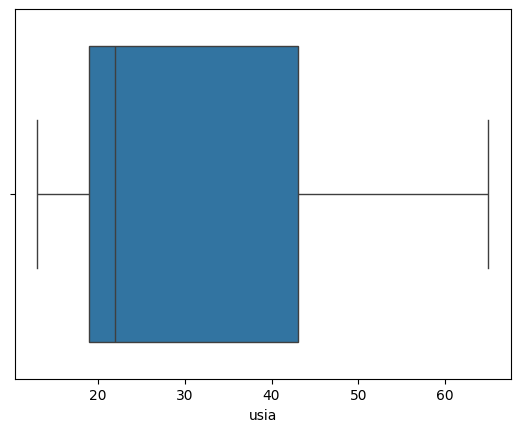

In [259]:
df_renamed = df_renamed[(df_renamed["usia"]>lowerbound) & (df_renamed["usia"]<upperbound)]
print(df_renamed.shape[0])
sns.boxplot(data=df_renamed, x=df_renamed["usia"])

# Only dropped 1 value :,) So it's alright

In [260]:
df_renamed.to_csv("../data/13222067_cleaned.csv", index=False)